In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [63]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [64]:
df_train.shape

(8693, 14)

In [65]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [66]:
print(df_train.info())
print("---------------section break--------------")
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
---------------section break--------------
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination   

In [67]:
df_train['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [68]:
df_train['source'] = 'df_train'
df_test['source'] = 'df_test'
df_test["Transported"] = np.nan

In [69]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  source        12970 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.5+ MB


In [71]:
numeric_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

In [72]:
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

In [73]:
df[['Deck', 'CabinNum', 'Side']] = df['Cabin'].str.split('/', expand=True)

In [74]:
df.drop(["Name", "Cabin"], axis=1, inplace=True)

In [75]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
encoders = {}

In [76]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_features:
    le = LabelEncoder()
    df[col] = df[col].fillna('Missing')
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

In [77]:
from sklearn.cluster import KMeans
kmeans_features = numeric_features
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[kmeans_features])

In [78]:
for col in categorical_features:
    missing_val = encoders[col].transform(['Missing'])[0]
    for cluster in df['Cluster'].unique():
        rows_in_cluster = (df['Cluster'] == cluster)
        mode_val = df.loc[rows_in_cluster & (df[col] != missing_val), col].mode()

        if not mode_val.empty:
            df.loc[rows_in_cluster & (df[col] == missing_val), col] - mode_val[0]

In [79]:
for col in categorical_features:
    df[col] = encoders[col].inverse_transform(df[col])

In [80]:
df["CryoSleep"] = df["CryoSleep"].map({'True': True, 'False': False})
df['VIP'] = df['VIP'].map({'True': True, 'False': False})

In [86]:
from sklearn.preprocessing import LabelEncoder

df["CryoSleep"] = df["CryoSleep"].astype(str)
df["VIP"] = df["VIP"].astype(str)

categorical_features = df.select_dtypes(include = 'object')

encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [87]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,source,Deck,CabinNum,Side,Cluster
0,0,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0
1,1,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,5,0,2,0
2,2,1,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,2,3
3,3,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,2,3
4,4,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,5,1,2,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  int64  
 1   HomePlanet    12970 non-null  int64  
 2   CryoSleep     12970 non-null  int64  
 3   Destination   12970 non-null  int64  
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  int64  
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Transported   12970 non-null  int64  
 12  source        12970 non-null  int64  
 13  Deck          12970 non-null  int64  
 14  CabinNum      12970 non-null  int64  
 15  Side          12970 non-null  int64  
 16  Cluster       12970 non-null  int32  
dtypes: float64(6), int32(1), int64(10)
memory usage: 1.6 MB


In [96]:
# 1 = train, 0 = test
final_train = df[df['source'] == 1].drop(['source', 'Cluster', 'PassengerId'], axis=1)
final_test = df[df['source'] == 0].drop(['source', 'Cluster', 'Transported', 'PassengerId'], axis=1)

y = final_train['Transported'].astype(bool)
X = final_train.drop('Transported', axis=1)




In [95]:
print(df['source'].value_counts())

source
1    8693
0    4277
Name: count, dtype: int64


In [97]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   int64  
 12  CabinNum      8693 non-null   int64  
 13  Side          8693 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1018.7 KB


In [98]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 8693 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int64  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Deck          4277 non-null   int64  
 11  CabinNum      4277 non-null   int64  
 12  Side          4277 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 467.8 KB


In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Deck          8693 non-null   int64  
 11  CabinNum      8693 non-null   int64  
 12  Side          8693 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 950.8 KB


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.7901092581943646
              precision    recall  f1-score   support

       False       0.78      0.80      0.79       861
        True       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



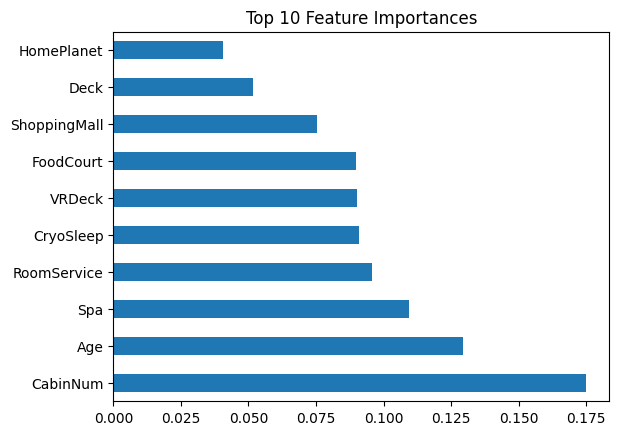

In [105]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [106]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

rf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(X, y)
print("Best Score from CV:", grid.best_score_)
print("Best Hyperparameters:", grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt

In [108]:
df['TotalSpend'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)




In [115]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

param_grid = {
    'n_estimators': [100],
    'max_depth': [6, 10],
    'learning_rate': [0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid.fit(X, y)

print("Best CV Accuracy:", grid.best_score_)
print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.8s[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.8s

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100,

In [117]:
best_model = grid.best_estimator_
predictions = best_model.predict(final_test)

test_ids = pd.read_csv("test.csv")["PassengerId"]

submission = pd.DataFrame({"PassengerId": test_ids, "Transported": predictions.astype(bool)})

submission.to_csv("submission_xgb.csv", index=False)
print("Submission saved as submission_xgb.csv")

Submission saved as submission_xgb.csv
